# 선 그래프 (Line plot) 그리기
## 선 그래프(꺾은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 **변화를 표현**할 때 많이 사용. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값 | 보통 x(시간), y(값)
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행.
- 선 스타일
    - linestyle 속성에 설정
    - https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html    

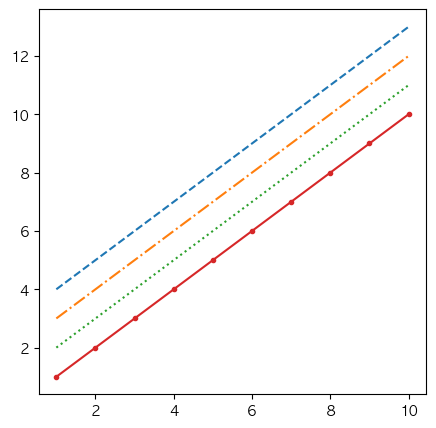

In [2]:
# 선스타일
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,10,num=10)
plt.figure(figsize=(5,5))
plt.plot(x, x+3, linestyle='--')
plt.plot(x, x+2, linestyle='-.')
plt.plot(x, x+1, linestyle=':')
plt.plot(x, x, marker='.')
plt.show()

### 선 그래프 활용
- 주식 가격 변화 시각화

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 년도를 index name으로 지정해서 조회
convert_int_cols = ['Close','High', 'Low', 'Open']
# dict: {값변경할컬럼:변경처리함수}
converters ={
        col: lambda x: int(float(x)) if x not in ("", "NaN") else pd.NA
        for col in convert_int_cols
    }
df_electron = pd.read_csv(
    'data/samsung_electronics_2024-2025.csv',
     parse_dates=['Date'], # Date컬럼을날짜형식으로 변환
     index_col='Date',     # Date컬럼을 index로 지정
     converters=converters # {변환할 컬럼명: 변환 함수}
)

df_bio = pd.read_csv(
    'data/samsung_biologics_2024-2025.csv',
     parse_dates=['Date'], # Date컬럼을날짜형식으로 변환
     index_col='Date',     # Date컬럼을 index로 지정
     converters=converters
) 

df_electron.shape, df_bio.shape

((434, 5), (434, 5))

In [4]:
df_electron.info()
print('==============================================================================')
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 434 entries, 2024-01-02 to 2025-10-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   434 non-null    int64
 1   High    434 non-null    int64
 2   Low     434 non-null    int64
 3   Open    434 non-null    int64
 4   Volume  434 non-null    int64
dtypes: int64(5)
memory usage: 20.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 434 entries, 2024-01-02 to 2025-10-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   434 non-null    int64
 1   High    434 non-null    int64
 2   Low     434 non-null    int64
 3   Open    434 non-null    int64
 4   Volume  434 non-null    int64
dtypes: int64(5)
memory usage: 20.3 KB


In [5]:
df_electron.head()  # pandas에서의 시계열 데이터 date를 index로. 

Close   High    Low   Open    Volume
Date                                            
2024-01-02  76984  77177  75630  75630  17142847
2024-01-03  74469  76210  74469  75920  21753644
2024-01-04  74082  74759  73599  73599  15324439
2024-01-05  74082  74566  73889  74179  11304316
2024-01-08  73986  74953  73889  74469  11088724

In [6]:
df_bio.head()

Close    High     Low    Open  Volume
Date                                              
2024-01-02  789000  800000  756000  760000  199238
2024-01-03  787000  793000  776000  782000   87350
2024-01-04  770000  784000  759000  782000   77785
2024-01-05  756000  769000  753000  765000   60943
2024-01-08  749000  763000  746000  763000   60440

In [7]:
# 컬럼명 변경 - 소문자로 변경
df_electron.columns = [col.lower() for col in df_electron.columns]
df_electron.head()

close   high    low   open    volume
Date                                            
2024-01-02  76984  77177  75630  75630  17142847
2024-01-03  74469  76210  74469  75920  21753644
2024-01-04  74082  74759  73599  73599  15324439
2024-01-05  74082  74566  73889  74179  11304316
2024-01-08  73986  74953  73889  74469  11088724

In [8]:
df_bio.columns = [col.lower() for col in df_bio.columns]
df_bio.head()

close    high     low    open  volume
Date                                              
2024-01-02  789000  800000  756000  760000  199238
2024-01-03  787000  793000  776000  782000   87350
2024-01-04  770000  784000  759000  782000   77785
2024-01-05  756000  769000  753000  765000   60943
2024-01-08  749000  763000  746000  763000   60440

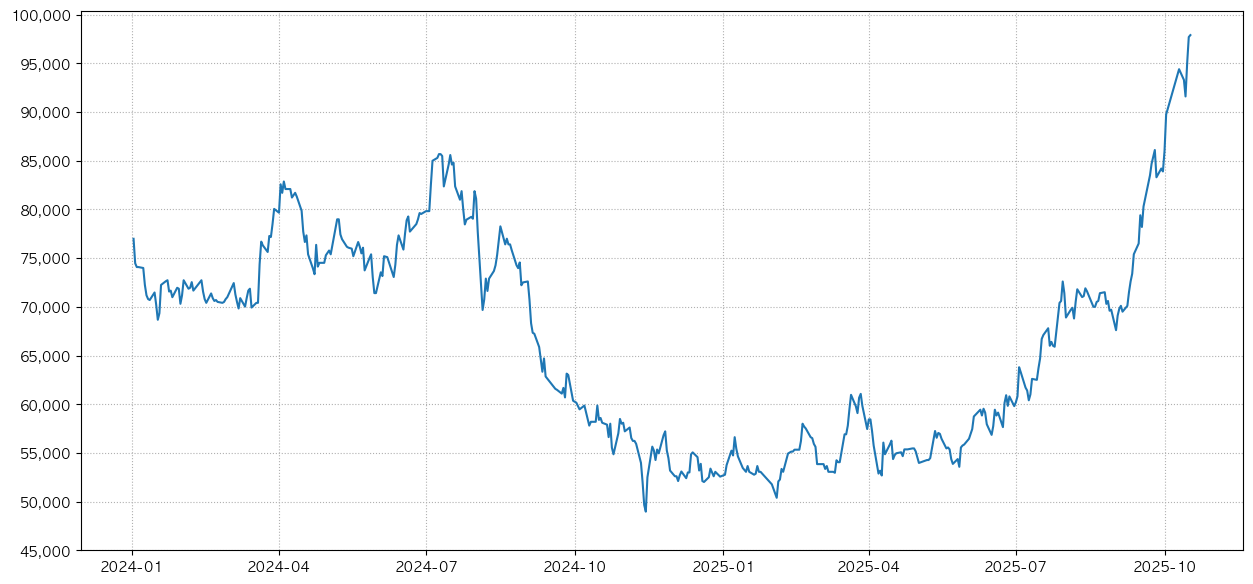

In [9]:
## 삼성 전자 날짜별 종가의 변화율
plt.figure(figsize=(15, 7))
plt.plot(
    df_electron.index,  # x축: 변화기준 컬럼
    df_electron['close']  # y축: 변화율을 확인할 컬럼.
)

# 눈금(ticks) 지정
# xticks(): X축 눈금 지정
# yticks(): Y축 눈금 지정

plt.yticks(
    range(45000, 100001, 5000),  # 눈금의 위치
    labels=[format(v, ',') for v in range(45000, 100001, 5000)] # 눈금 Label 값
)
plt.grid(True, linestyle=":")
plt.show()

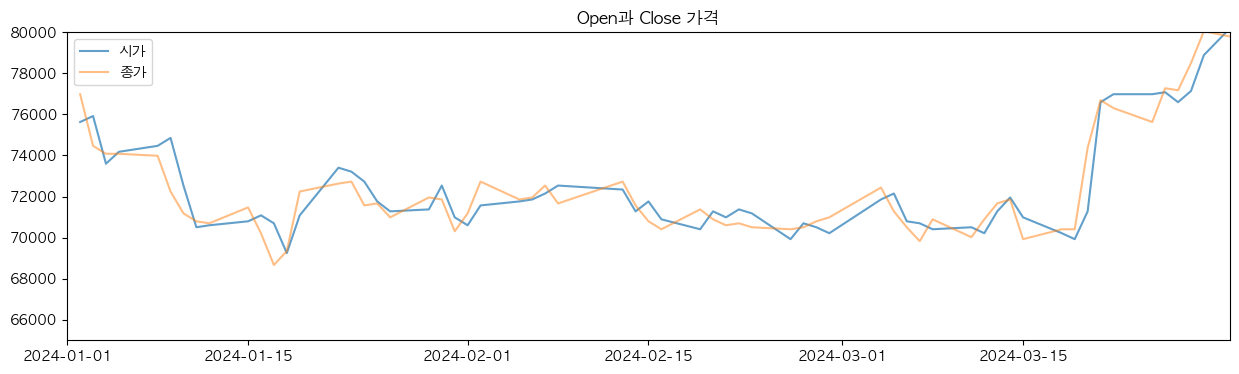

In [10]:
%matplotlib inline
# 시가, 종가를 같이 출력
plt.figure(figsize=(15, 4))
plt.plot(df_electron.index, df_electron['open'], label="시가", alpha=0.7)
plt.plot(df_electron.index, df_electron['close'], label="종가", alpha=0.5)

plt.title("Open과 Close 가격")
plt.legend()

# 영역이 너무 넓어서 잘 안 보일 때, xlim : x축의 범위 지정 | ylim : y축의 범위 지정
plt.xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-03-31')) 
plt.ylim(65000, 80000)  # 확대해서 보기 위해 y축 범위 지정.
plt.show()

### 값의 범위가 다른 두 데이터셋을 하나의 subplot에 선 그래프로 그리기

- **선 그래프(Line Plot)** 는 기본적으로 각 축의 범위를 데이터의 최소값(`min`)과 최대값(`max`)에 맞춰 자동 설정.  
따라서 값의 범위 차이가 큰 두 데이터를 하나의 subplot에 함께 그리면, **값의 범위가 적은 데이터는 거의 직선처럼 보이는 문제** 발생.

- 두 데이터의 **변화 추이(Trend)** 를 비교하고자 하는 것이 목적이라면, 한쪽 축은 첫 번째 데이터의 값, 다른 한쪽 축은 두 번째 데이터의 값을 표현하도록 **양쪽 축을 사용하는 방식**을 사용 가능.

#### 구현 방법

- **X축을 공유하고 Y축을 두 개 사용하는 경우**

  - 한 subplot에 두 개의 Y축을 배치하여 값 범위가 다른 두 데이터를 동시에 시각화.
  - `Axes.twinx()` 메서드를 사용하여 동일한 X축을 공유하는 보조 Y축을 생성.

  ```python
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()  # X축을 공유하는 두 번째 Y축 생성
  ```

- **Y축을 공유하고 X축을 두 개 사용하는 경우**

  - 시간 또는 구간 단위가 서로 다른 데이터를 함께 비교할 때 사용.
  - `Axes.twiny()` 메서드를 사용하여 동일한 Y축을 공유하는 보조 X축을 생성.

  ```python
  fig, ax1 = plt.subplots()
  ax2 = ax1.twiny()  # Y축을 공유하는 두 번째 X축 생성
  ```

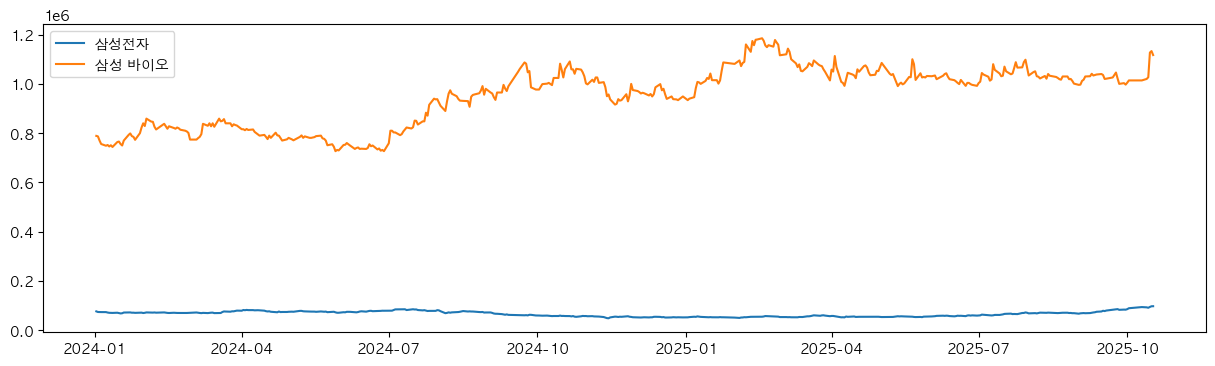

In [11]:
%matplotlib inline
plt.figure(figsize=(15, 4))

plt.plot(df_electron.index, df_electron['close'], label="삼성전자")
plt.plot(df_bio.index, df_bio['close'], label="삼성 바이오")

# plt.ylim(0, 15)
plt.legend()
plt.show()

In [12]:
format(df_electron['close'].max().item(), ','), format(df_bio['close'].max().item(), ',')

('97,900', '1,185,000')

In [13]:
format(df_electron['close'].min().item(), ','), format(df_bio['close'].max().item(), ',')

('48,968', '1,185,000')

> - 한 axes의 여러 데이터를 이용해서 여러 그래프를 그리는 경우. 
>     - 둘 합쳐서 최소값과 최대값을 기준으로 축의 값의 범위를 잡아준다.
>     - 위의 경우 y축 값의 범위(최대농도와 관측일수 중 최소값 ~ 최대농도와 관측일수 중 최대값)

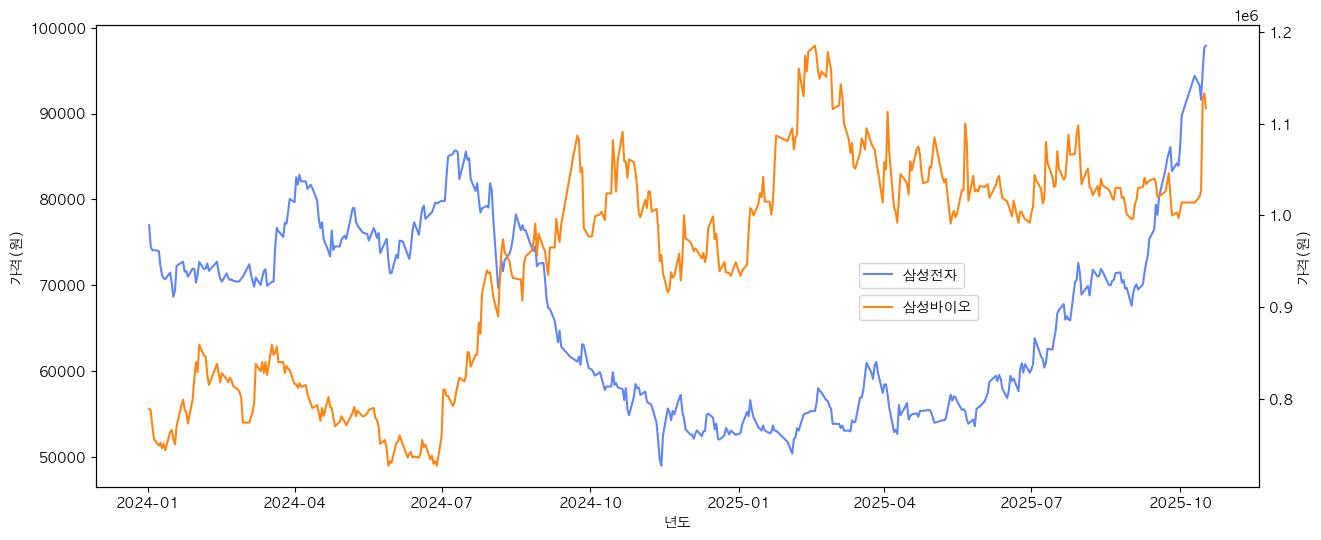

In [45]:
# x축 공유 y축은 따로 생성
plt.figure(figsize=(15, 6))

# Axes 객체 생성.
ax1 = plt.gca()   # 그래프 그릴 수있는 Axes(Subplot)객체 반환 (y: 왼쪽)
ax2 = ax1.twinx() # ax1과 x축을 같이 사용하는 Axes 객체를 생성해서 반환. (y: 오른쪽)

ax1.plot(df_electron.index, df_electron['close'], color="#295cf5bf", label="삼성전자")
ax1.set_xlabel("년도")
ax1.set_ylabel("가격(원)")
ax1.legend(bbox_to_anchor=(0.65, 0.5), loc="upper left")  # ax1 범례 위치 지정.
# ax1.legend(bbox_to_anchor=(1.05, 1.01), loc="upper left")  # ax1 범례 위치 지정.
# ax1.legend(loc="upper left") # 범례 위치 지정하는 다른 방법. 아래 설명.
# ax1.legend()  # best 위치 알아서 지정.

ax2.plot(df_bio.index, df_bio['close'], color="#ff8513ff",  label="삼성바이오")
ax2.set_ylabel("가격(원)")
ax2.legend(bbox_to_anchor=(0.65, 0.43), loc="upper left")  # ax2 범례 위치 지정.
# ax2.legend()

plt.show()

> # 범례(Legend) 박스의 위치
> - legend() 메소드로 설정
>   
> ### 1.  axes 안쪽에 정해진 위치를 지정 - loc만 설정
> - 위/아래 : upper center, lower
> - 좌/우   : left  center right
> - 정가운데: center,    
> - 알아서 최적의 장소를 선택: best
> 
> ### 2. 원하는 위치에 지정 -  bbox_to_anchor, loc 둘을 설정
> - `bbox_to_anchor=(x축의 위치, y축의 위치)`: bbox의 위치 지정  
>   - `bbox_to_anchor`의 상대적 좌표
>     ```
>     X축: 0-----------------------1
>     Y축
>     1
>     |
>     |
>     0
>     ```
> - `loc="위아래   좌우"`  bbox_to_anchor에 bbox의 어느 위치를 맞출지 지정.
>   - ex: "upper left": bbox의 좌상단을 bbox_to_anchor 위치에 맞춰서 위치시킨다.
> 

In [ ]:
# 10/30(목) 17:50 수업 끝!

# 산점도 (Scatter Plot) 그리기
## 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 [상관관계나](#상관계수) 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
    - marker
        - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
        - https://matplotlib.org/stable/api/markers_api.html 

In [15]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 10)

In [16]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

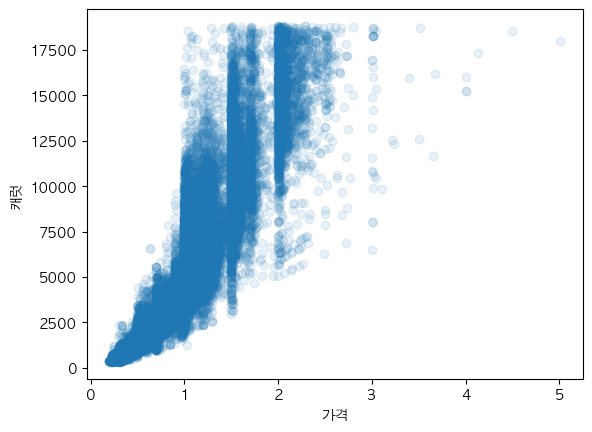

In [17]:
import matplotlib.pyplot as plt


plt.scatter(
    df['carat'],  # x축에 들어갈 값
    df['price'],  # y축에 들어갈 값. x, y의 같은 index 위치에 점을 찍는다.
    alpha=0.1     # 투명도. (투명)0 ~ 1(농도100%)
)
plt.xlabel("가격")
plt.ylabel("캐럿")
plt.show()

In [18]:
# 상관계수 계산
df[['price', 'carat']].corr()

price     carat
price  1.000000  0.921591
carat  0.921591  1.000000

> - ### 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - -1 ~ 1 사이의 값이 나온다. 
>         - 양의 상관관계: 0 ~ 1 (비례 관계) 
>         - 음의 상관관계: -1 ~ 0 (반비례 관계)
>         - 절대값 기준 1로 갈수록 두 변수의 상관관계가 강하고 0으로 갈수록 약하다.
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

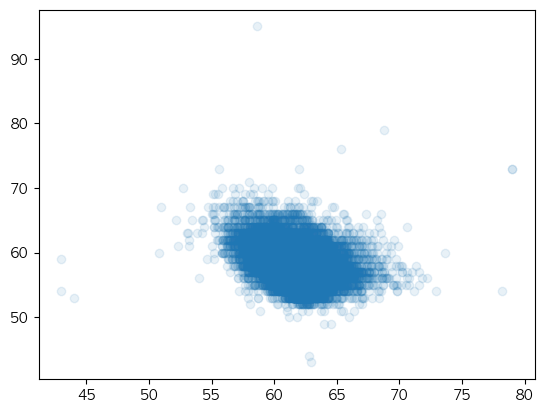

In [19]:
plt.scatter(df['depth'], df['table'], alpha=0.1)
plt.show()

In [20]:
df[['depth', 'table']].corr()

depth     table
depth  1.000000 -0.295779
table -0.295779  1.000000

# 막대그래프 (Bar plot) 그리기
## 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

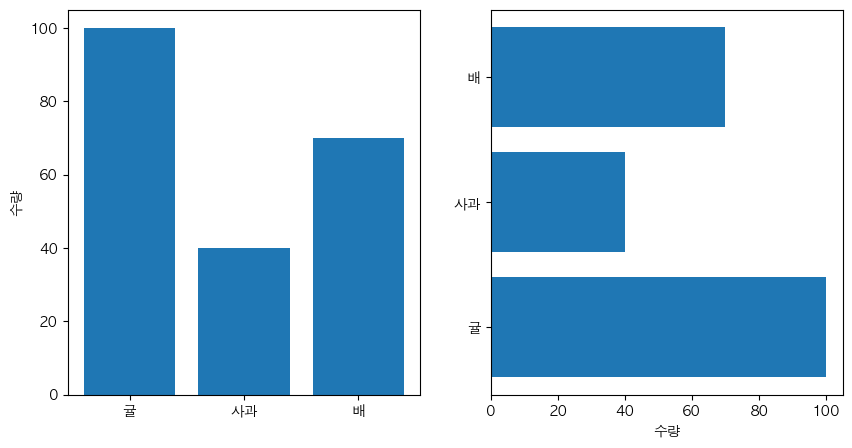

In [21]:
x = ['귤', '사과', '배']
y = [100, 40, 70]

plt.figure(figsize=(10, 5))
# 수직 막대그래프
plt.subplot(1, 2, 1)
plt.bar(x, y)
plt.ylabel("수량")

# 수평 막대그래프
plt.subplot(1, 2, 2)
plt.barh(x, y)
plt.xlabel("수량")
plt.show()

In [22]:
df = pd.read_excel("data/강수량.xlsx", index_col="계절")
df.shape

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
df

2009   2010    2011   2012   2013   2014   2015   2016   2017
계절                                                                
봄   231.3  302.9   256.9  256.5  264.3  215.9  223.2  312.8  118.6
여름  752.0  692.6  1053.6  770.6  567.5  599.8  387.1  446.2  609.7
가을  143.1  307.6   225.5  363.5  231.2  293.1  247.7  381.6  172.5
겨울  142.3   98.7    45.6  139.3   59.9   76.9  109.1  108.1   75.6

/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44053 (\

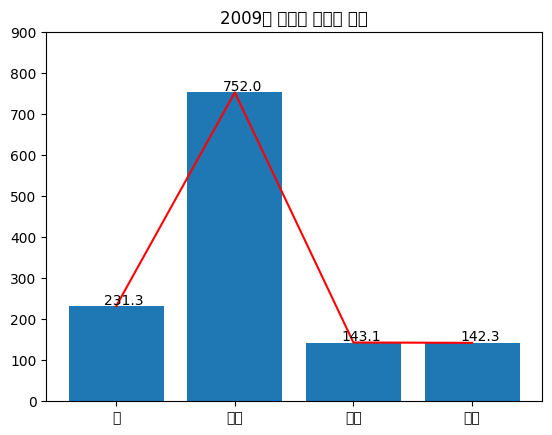

In [ ]:

plt.bar(df.index, df[2009])
plt.plot(df.index, df[2009], color='red') # 선그래프: 변화 흐름(추세)
plt.title("2009년 계절별 강수량 비교")    # 막대그래프: 단순 수량적 비교
# 막대의 값들을 출력
# text(x위치, y위치, str): (x, y) 위치에 str을 쓴다.
for x, y in enumerate(df[2009]):
    plt.text(x-0.1, y+5, str(y))
plt.ylim(0, 900)  
# plt.text(1, 200, "안녕") 
plt.show()

In [ ]:
df.loc['여름']

2009     752.0
2010     692.6
2011    1053.6
2012     770.6
2013     567.5
2014     599.8
2015     387.1
2016     446.2
2017     609.7
Name: 여름, dtype: float64

/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


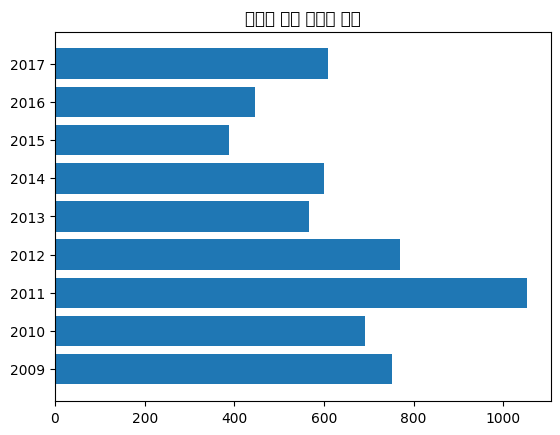

In [ ]:
## 수평막대그래프
# 년도별 여름 강수량 비교
plt.barh(df.columns, df.loc['여름'])
plt.title("년도별 여름 강수량 비교")

plt.yticks(df.columns)
plt.show()

# 파이차트(Pie chart)
- 전체 데이터량에서 각 범주(Category)가 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreanextweb.kr/front/stats/browser/browserUseStats.do

/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


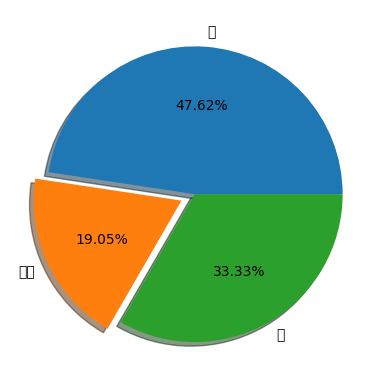

In [ ]:
x = ['귤', '사과', '배']
y = [100, 40, 70]
plt.pie(y, labels=x, 
        autopct='%.2f%%',   # 각  pie의 비율 값을 출력. 출력 format을 %타입 placeholder이용: %f: 실수, %d: 정수, %%: %
        explode=[0, 0.1, 0], 
        shadow=True
        )  

plt.show()

In [ ]:
pd.options.display.max_columns = 22

In [ ]:
!uv pip install xlrd

Audited 1 package in 30ms


In [ ]:
# date 를 string으로 읽기
df = pd.read_excel(
    "data/webbrowser_share.xls", 
    dtype={"date": str},  #  {"컬럼명": 타입} -> 컬럼을 어떤 타입으로 읽을지 지정.
    index_col="date"
)
df.shape
df

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [ ]:
df.info()

In [ ]:
# date 컬럼을 datetime 타입으로 읽어 오기.
df2 = pd.read_excel(
    "data/webbrowser_share.xls", 
    parse_dates=['date'], # 날짜 타입 컬럼 지정
    date_format='%Y.%m',  # 컬럼 값의 형식 지정.
    index_col="date"
)
df2

In [ ]:
# Chrome ~ Firefox, 나머지는 "기타" 컬럼으로 처리
web_df = df[df.columns[:6]].copy()
web_df

In [ ]:
# 나머지 컬럼들의 합계 
web_df['기타'] = df[df.columns[6:]].sum(axis=1)
web_df

In [ ]:
web_df.iloc[0].sort_values()

In [ ]:
## 막대그래프로 2018.08 의 브라우저별 점유율 비교
# 수량

v = web_df.iloc[0].sort_values()
plt.barh(v.index, v)
plt.show()

In [ ]:
# 파이차트를 이용해 점유율 시각화
plt.pie(web_df.iloc[0], 
         labels=web_df.columns, 
         autopct="%d%%",   
         explode=[0.1, 0, 0, 0, 0, 0, 0], shadow=True)
plt.title("2018년 1월 브라우져 점유율")
plt.show()

# 히스토그램(Histogram) 그리기
## 히스토그램

- 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 연속형 자료를 특정 구간(bin)으로 나눠 그 빈도를 나타낸 표
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [ ]:
tips = pd.read_csv("data/tips.csv")
print(tips.shape)
tips.head()

In [ ]:
plt.hist(
    tips['tip'], 
    bins=10, 
    edgecolor="white"
)
plt.show()

In [ ]:
pd.cut(tips['tip'], bins=10).value_counts()

In [ ]:
# bin의 간격을 명시적으로 지정.
plt.hist(tips['total_bill'], bins=[3, 10, 20, 40, 50, 60], edgecolor="w")
plt.show()

In [ ]:
tips.smoker.unique()

In [ ]:
# smoker 여부 별 total_bill의 분포.
y_total = tips.query("smoker=='Yes'")['total_bill']
n_total = tips.query("smoker=='No'")['total_bill']

plt.hist(y_total, bins=10, label="yes", alpha=0.5)
plt.hist(n_total, bins=10, label='no', alpha=0.5)
plt.xlabel("total bill")
plt.ylabel("수량")
plt.legend()
plt.show()

# 상자그래프(Boxplot) 그리기
## 상자그래프란
- **상자그래프(Box Plot)는** 데이터의 4분위수(quartile)를 기반으로 연속형 변수(continuous variable)의 분포를 요약하고, 이상치를 시각적으로 표현하는 그래프
  - 연속형 값들의 중심, 퍼짐(분포), 이상치들을 확인할 수있다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - IQR을 이용해 극단치 계산하기
            - IQR(Inter Quartile Range): $3분위수 - 1분위수$ 로 중간 50%값의 범위
            - 극단적으로 작은값: 1분위 - $IQR(3분위수-1분위수) * whis$   보다 작은 값들
            - 극단적으로 큰값: 3분위 + $IQR(3분위수-1분위수) * whis$  보다 큰 값들

In [ ]:
# 팁의 4분위수 +  이상치
plt.boxplot(tips['tip'], tick_labels=["TIP"])
plt.show()

In [ ]:
plt.boxplot(
    tips['tip'], 
    tick_labels=["TIP"], 
    whis=1 # 정상 범위 조절값. default: 1.5
)
plt.show()

In [ ]:
# 두개 변수(컬럼)의 분포를 비교
## 성별 tip의 분포
m_tip = tips.query("sex == 'Male'")['tip']
f_tip = tips.query("sex == 'Female'")['tip']
plt.boxplot([m_tip, f_tip], tick_labels=['남성', '여성'])
plt.show()